In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

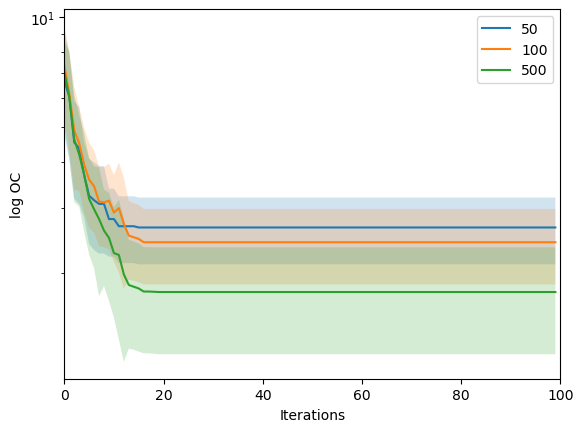

In [24]:
discretisation_size = [50, 100, 500]


noise_objective = 1e-06
noise_constraints = 1e-06
subfolder = "discrete_mistery_cKG_n_obj_" + str(noise_objective) + "_n_c_" + str(noise_constraints)
cwd = "/home/jungredda/CRYPT/DATA_ANAlYSIS/Constrained-KG"

aggregated_runs = []
for num_underlying_samples in discretisation_size:
    for it in range(30):
        path = cwd + "/" + subfolder + '/' + str(num_underlying_samples)
        file_name = 'it_' + str(it) + '.csv'
        
        data = pd.read_csv(path + "/" + file_name)
        optimum = np.array(data["optimum"])[-1]
        performance = np.array(data["OC GP mean"])
        full_performance = np.ones(110) * performance[-1]
        for i in range(len(performance)):
            full_performance[i] = performance[i]
    
        aggregated_runs.append(optimum - full_performance)
    
    mean = np.mean(aggregated_runs, axis=0)[10:]
    bound = 1.96* np.std(aggregated_runs, axis=0)[10:]/np.sqrt(30)
    plt.plot(range(100), mean, label = str(num_underlying_samples))
    plt.fill_between(range(100), mean+bound, mean-bound, alpha=0.2)

plt.xlabel("Iterations")
plt.yscale("log")
plt.ylabel("log OC")
plt.legend()
plt.xlim(0,100)
plt.show()